# Problem Sheet 1

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Polya urn models
Discrete time experiment: 
- initally there are k balls (each unique colour).
- At each time step, draw one ball uniformaly at random and then replace two balls of that colour. 

Transition probability: 

$$p(\underline{x} + e_i | \underline{x}) = \frac{f_i x_i^\gamma}{\sum_{j=1}^{k} f_j x_j^\gamma} $$

In [14]:
#uniform probability (f_i = 1 and γ = 1)

k = 5
X0 = np.ones(k)
T = 50
XN = np.ones((T, k)) # 

current_state = []
current_state.extend(range(k))
for j in range(1,T):
    r = np.random.randint(0,len(current_state)-1)# random is inclusive [a,b] but remember python indexes from 0 to k-1
    newBall = current_state[r] # chooses which colour ball
    XN[j:,newBall] = XN[j-1,newBall]+1 
    current_state.append(newBall)
print(XN)
print(current_state)

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  2.  1.  1.]
 [ 1.  2.  2.  1.  1.]
 [ 1.  2.  3.  1.  1.]
 [ 1.  2.  4.  1.  1.]
 [ 1.  3.  4.  1.  1.]
 [ 1.  4.  4.  1.  1.]
 [ 1.  4.  5.  1.  1.]
 [ 1.  4.  5.  2.  1.]
 [ 1.  4.  6.  2.  1.]
 [ 1.  4.  6.  3.  1.]
 [ 1.  4.  7.  3.  1.]
 [ 1.  5.  7.  3.  1.]
 [ 1.  6.  7.  3.  1.]
 [ 1.  7.  7.  3.  1.]
 [ 1.  7.  8.  3.  1.]
 [ 1.  8.  8.  3.  1.]
 [ 1.  9.  8.  3.  1.]
 [ 1. 10.  8.  3.  1.]
 [ 1. 10.  8.  4.  1.]
 [ 1. 11.  8.  4.  1.]
 [ 1. 12.  8.  4.  1.]
 [ 2. 12.  8.  4.  1.]
 [ 2. 12.  8.  5.  1.]
 [ 2. 12.  9.  5.  1.]
 [ 2. 12. 10.  5.  1.]
 [ 2. 13. 10.  5.  1.]
 [ 2. 14. 10.  5.  1.]
 [ 2. 15. 10.  5.  1.]
 [ 2. 15. 11.  5.  1.]
 [ 2. 15. 12.  5.  1.]
 [ 2. 15. 12.  6.  1.]
 [ 2. 16. 12.  6.  1.]
 [ 2. 16. 13.  6.  1.]
 [ 2. 16. 14.  6.  1.]
 [ 2. 16. 15.  6.  1.]
 [ 2. 16. 16.  6.  1.]
 [ 2. 17. 16.  6.  1.]
 [ 2. 18. 16.  6.  1.]
 [ 2. 18. 17.  6.  1.]
 [ 2. 18. 17.  7.  1.]
 [ 2. 18. 18.  7.  1.]
 [ 2. 19. 18.  7.  1.]
 [ 2. 19. 1

In [9]:
A = np.eye(10)
A[5:,6] = 1
A

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1.]])

In [16]:
XN.sort(axis =1) #try without this

Text(0.5, 1.0, 'Polya urn')

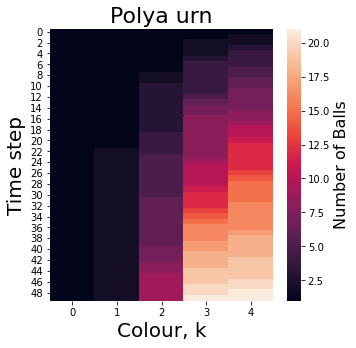

In [17]:
plt.figure(figsize = (5,5))
# pal = sns.color_palette("husl", 5000)

pcm = sns.heatmap(XN,cbar_kws={'label': r'Number of Balls'})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.ylabel('Time step', fontsize = 20)
plt.xlabel('Colour, k', fontsize = 20)
plt.title('Polya urn', fontsize = 22)

# plt.tight_layout()
# plt.savefig('.pdf')

In [23]:
#fitness probability with reinforcement paramter

k = 500
X0 = np.ones(k)
T = 8000
gamma = 0.5
fitness = np.ones(k)
XN = np.ones((T, k))

current_state = []
current_state.extend(range(k))
for j in range(1,T):
    denominator = sum([fitness[kk]*XN[j,kk]**gamma for kk in range(k)])
    selection_prob = [fitness[kk]*(XN[j,kk])**gamma/denominator for kk in range(k)]
    r = np.random.choice(k, p = selection_prob) #non uniform random choice from range(len(current))
    newBall = current_state[r]
    XN[j:,newBall] = XN[j-1,newBall]+1
    current_state.append(newBall)
# XN.sort(axis =1) #try without this

In [89]:
def Plotter(a):
    x = np.linspace(1,11,10)
    p = plt.plot(x, a*x**2)
    b  =a+2
    plt.show()
    return a+1, b

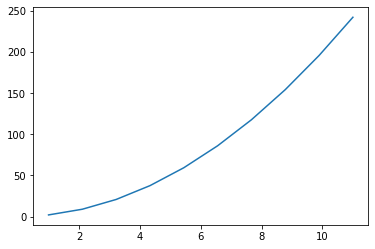

In [92]:
a, b = Plotter(2)

In [93]:
b

4

In [49]:
def PolyUrn(K, T, gamma, fitness):
    '''Function that returns the State Space of the k colour polyurn up to time T. 
    Each colour has a fitness (given by array) and all colours have same reinforcement parameter'''
    
    XN = np.ones((T, K))
    for j in range(1,T):
        denominator = sum([fitness[kk]*XN[j,kk]**gamma for kk in range(K)])
        selection_prob = [fitness[kk]*(XN[j,kk])**gamma/denominator for kk in range(K)]
        newBall = np.random.choice(K, p = selection_prob) #non uniform random choice from range(len(current))
        XN[j:,newBall] = XN[j-1,newBall]+1
    #XN.sort(axis =1) #try without this
    
    return XN

Text(0.5, 1.0, 'Polya urn')

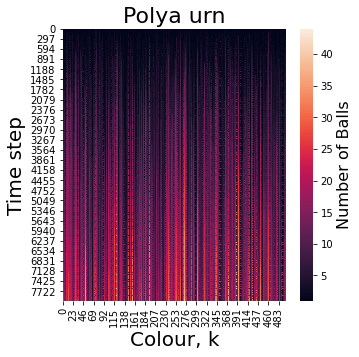

In [22]:
plt.figure(figsize = (5,5))
pcm = sns.heatmap(XN,cbar_kws={'label': r'Number of Balls'})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.ylabel('Time step', fontsize = 20)
plt.xlabel('Colour, k', fontsize = 20)
plt.title('Polya urn', fontsize = 22)


# Empirical Tail Distributions

Empirical CDF: https://www.statsmodels.org/devel/generated/statsmodels.distributions.empirical_distribution.ECDF.html

In [31]:
from statsmodels.distributions.empirical_distribution import ECDF

In [32]:
k = 500
ttLarge = 80000
ttMid = 20000
ttSmall = 5000
gg = 1
ff = np.ones(k)


In [42]:
def PlotThem(gg, ff):
    p = PolyUrn(k, ttMid, gg, ff)
    return p

In [61]:
ResultSmall = PolyUrn(k, ttSmall, gg, ff)
print(ResultSmall)

[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [31. 21. 10. ...  7. 37. 19.]
 [31. 21. 10. ...  7. 37. 19.]
 [31. 21. 10. ...  7. 37. 19.]]


In [64]:
Sum = sum(ResultSmall.transpose())
print(Sum.shape)

print(Sum)

(5000,)
[ 500.  501.  502. ... 5497. 5498. 5499.]


In [76]:
RS_norm = np.divide(ResultSmall.transpose(), sum(ResultSmall.transpose())).transpose()
print(RS_norm)
print(ResultSmall)

[[0.002      0.002      0.002      ... 0.002      0.002      0.002     ]
 [0.00199601 0.00199601 0.00199601 ... 0.00199601 0.00199601 0.00199601]
 [0.00199203 0.00199203 0.00199203 ... 0.00199203 0.00199203 0.00199203]
 ...
 [0.00563944 0.00382027 0.00181917 ... 0.00127342 0.00673094 0.00345643]
 [0.00563841 0.00381957 0.00181884 ... 0.00127319 0.00672972 0.0034558 ]
 [0.00563739 0.00381888 0.00181851 ... 0.00127296 0.0067285  0.00345517]]
[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [31. 21. 10. ...  7. 37. 19.]
 [31. 21. 10. ...  7. 37. 19.]
 [31. 21. 10. ...  7. 37. 19.]]


In [74]:
print(ResultSmall.shape)
print(RS_norm.shape)

(5000, 500)
(5000, 500)


In [33]:
ResultSmall = PolyUrn(k, ttSmall, gg, ff)
ResultMid = PolyUrn(k, ttMid, gg, ff)
ResultLarge = PolyUrn(k, ttLarge, gg, ff)

In [34]:
ecdf_Large = ECDF(ResultLarge[ttLarge-1,:])
ecdf_Mid = ECDF(ResultMid[ttMid-1,:])
ecdf_Small = ECDF(ResultSmall[ttSmall-1,:])

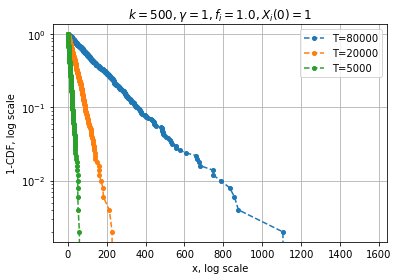

In [37]:
# plt.plot(bins, tail,linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.plot(ecdf_Large.x, np.ones(len(ecdf_Large.y))-ecdf_Large.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(ttLarge))
plt.plot(ecdf_Mid.x, np.ones(len(ecdf_Mid.y))-ecdf_Mid.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(ttMid))
plt.plot(ecdf_Small.x, np.ones(len(ecdf_Small.y))-ecdf_Small.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(ttSmall))

plt.yscale('log')
# plt.xscale('log')
plt.legend()
plt.ylabel("1-CDF, log scale")
plt.title(r'$k = {}, γ = {}, f_i = {}, X_i(0) = 1$'.format(k, gg, ff[0]))
plt.xlabel('x, log scale')
plt.grid(True)

In [45]:
def PlotThem(gg, ff):
    ResultSmall = PolyUrn(k, ttSmall, gg, ff)
    ResultMid = PolyUrn(k, ttMid, gg, ff)
    ResultLarge = PolyUrn(k, ttLarge, gg, ff)
    
    ecdf_Large = ECDF(ResultLarge[ttLarge-1,:])
    ecdf_Mid = ECDF(ResultMid[ttMid-1,:])
    ecdf_Small = ECDF(ResultSmall[ttSmall-1,:])
    
    plt.plot(ecdf_Large.x, np.ones(len(ecdf_Large.y))-ecdf_Large.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(ttLarge))
    plt.plot(ecdf_Mid.x, np.ones(len(ecdf_Mid.y))-ecdf_Mid.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(ttMid))
    plt.plot(ecdf_Small.x, np.ones(len(ecdf_Small.y))-ecdf_Small.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(ttSmall))

    plt.yscale('log')
    # plt.xscale('log')
    plt.legend()
    plt.ylabel("1-CDF, log scale")
    plt.title(r'$k = {}, γ = {}, f_i = {}, X_i(0) = 1$'.format(k, gg, ff[0]))
    plt.xlabel('x, log scale')
    plt.grid(True)
    return plt.show()

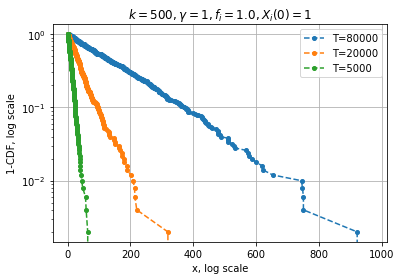

In [46]:
PlotThem(1, np.ones(k))

In [97]:
def PlotThem(gg, ff):
#     ResultSmall = PolyUrn(k, ttSmall, gg, ff)
#     ResultMid = PolyUrn(k, ttMid, gg, ff)
#     ResultLarge = PolyUrn(k, ttLarge, gg, ff)
    
    RS_norm = np.divide(ResultSmall.transpose(), sum(ResultSmall.transpose())).transpose()
    RM_norm = np.divide(ResultMid.transpose(), sum(ResultMid.transpose())).transpose()
    RL_norm = np.divide(ResultLarge.transpose(), sum(ResultLarge.transpose())).transpose()
    
    ecdf_Large = ECDF(ResultLarge[ttLarge-1,:])
    ecdf_Mid = ECDF(ResultMid[ttMid-1,:])
    ecdf_Small = ECDF(ResultSmall[ttSmall-1,:])
    
    ecdf_Lnorm = ECDF(RS_norm[ttSmall-1,:])
    ecdf_Mnorm = ECDF(RM_norm[ttMid-1,:])
    ecdf_Snorm = ECDF(RL_norm[ttLarge-1,:])
    
    plt.figure(figsize = (20,8))
    plt.subplot(1,2,1)
    plt.plot(ecdf_Large.x, np.ones(len(ecdf_Large.y))-ecdf_Large.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(ttLarge))
    plt.plot(ecdf_Mid.x, np.ones(len(ecdf_Mid.y))-ecdf_Mid.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(ttMid))
    plt.plot(ecdf_Small.x, np.ones(len(ecdf_Small.y))-ecdf_Small.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(ttSmall))

    plt.yscale('log')
    plt.xscale('log')
    plt.legend()
    plt.ylabel("1-CDF, log scale")
    plt.title(r'$k = {}, γ = {}, f_i = {}, X_i(0) = 1$'.format(k, gg, ff[0]))
    plt.xlabel('x, log scale')
    plt.grid(True)
    
    plt.subplot(1,2,2)
    plt.plot(ecdf_Lnorm.x, np.ones(len(ecdf_Lnorm.y))-ecdf_Lnorm.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(ttLarge))
    plt.plot(ecdf_Mnorm.x, np.ones(len(ecdf_Mnorm.y))-ecdf_Mnorm.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(ttMid))
    plt.plot(ecdf_Snorm.x, np.ones(len(ecdf_Snorm.y))-ecdf_Snorm.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(ttSmall))
    
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()
    plt.ylabel("1-CDF, log scale")
    plt.title(r'$k = {}, γ = {}, f_i = {}, X_i(0) = 1$'.format(k, gg, ff[0]))
    plt.xlabel('x, log scale')
    plt.grid(True)
    
    plt.show
    
    return

(array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [31., 21., 10., ...,  7., 37., 19.],
        [31., 21., 10., ...,  7., 37., 19.],
        [31., 21., 10., ...,  7., 37., 19.]]),
 array([[  1.,   1.,   1., ...,   1.,   1.,   1.],
        [  1.,   1.,   1., ...,   1.,   1.,   2.],
        [  1.,   1.,   1., ...,   1.,   2.,   2.],
        ...,
        [  1.,   1.,   1., ..., 214., 228., 396.],
        [  1.,   1.,   1., ..., 214., 228., 396.],
        [  1.,   1.,   1., ..., 214., 228., 396.]]),
 array([[1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
         1.000e+00],
        [1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
         2.000e+00],
        [1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 2.000e+00,
         2.000e+00],
        ...,
        [1.000e+00, 1.000e+00, 1.000e+00, ..., 8.770e+02, 1.105e+03,
         1.565e+03],
        [1.000e+00, 1

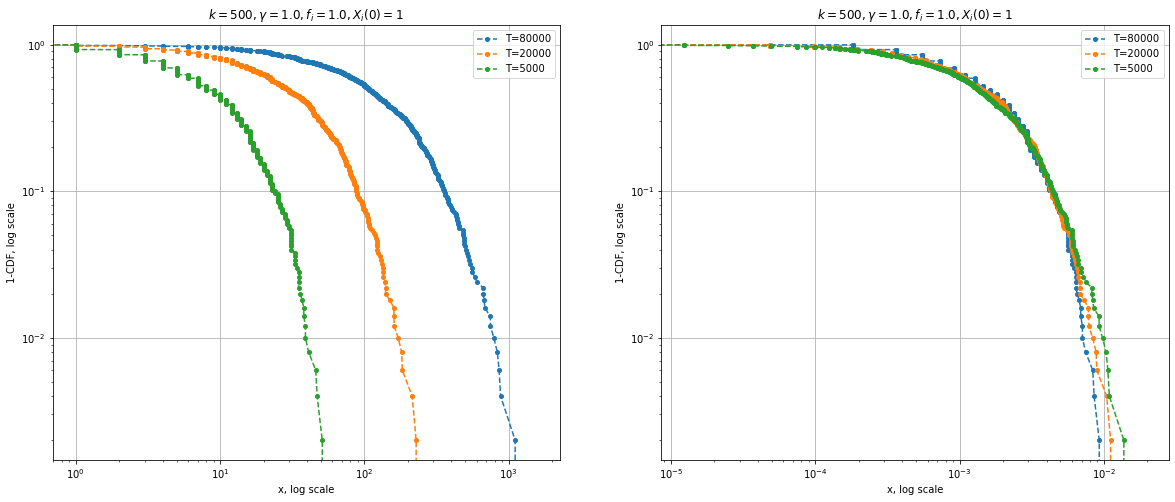

In [99]:
PlotThem(1.0, np.ones(k))

# Notes: Gershgorin disk theorem

Given a matrix $A \in \mathbb{R}^{n \times n}$, the Gershgorin disk theorem stats that all eigenvalues lie in a least one Gershogorin disk,

$D_i$ is a disk centered on $a_{i,i}$ with radius $R_i = \sum_{j \neq i} a_{i,j}$.

In [2]:
def plot_circle(center,radius): # Function to plot a circle
    x=np.linspace(-1,1,500)
    x*=radius
    x+=center
    y=np.sqrt(radius**2-(x-center)**2)
    plt.plot(x,y,'r-',lw=3)
    plt.plot(x,-1*y,'r-',lw=3)

Consider a random walk, with 4 states with periodic BC

In [4]:
p=0.3
q=0.7
A=np.array([[0,p,0,0,q],[q,0,p,0,0],[0,q,0,p,0],[0,0,q,0,p],[p,0,0,q,0]])
print(A)

centers=[]
radii=[]

N=A.shape[0]
for i in range(N):
    centers.append(A[i,i])
    temp=0.0
    for j in range(N):
        if j!=i:
            temp+=A[i,j]
    radii.append(temp)

evals,evecs=np.linalg.eig(A)

[[ 0.   0.3  0.   0.   0.7]
 [ 0.7  0.   0.3  0.   0. ]
 [ 0.   0.7  0.   0.3  0. ]
 [ 0.   0.   0.7  0.   0.3]
 [ 0.3  0.   0.   0.7  0. ]]


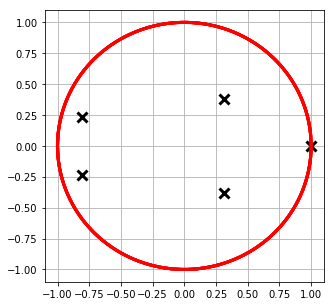

In [5]:
plt.figure(figsize = (5,5))
for i in range(N):
    plot_circle(centers[i],radii[i]) # Plot disk i
    plt.plot(np.real(evals[i]),np.imag(evals[i]),'kx',mew=3,ms=10) # Plot evalue i
lim=1.1
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()



In [6]:
print(evals)
print ('\n eigenvectors', evecs.T)

[-0.80901699+0.2351141j  -0.80901699-0.2351141j   1.00000000+0.j
  0.30901699+0.38042261j  0.30901699-0.38042261j]

 eigenvectors [[-0.1381966-0.4253254j  -0.1381966+0.4253254j   0.3618034-0.26286556j
  -0.4472136+0.j          0.3618034+0.26286556j]
 [-0.1381966+0.4253254j  -0.1381966-0.4253254j   0.3618034+0.26286556j
  -0.4472136-0.j          0.3618034-0.26286556j]
 [-0.4472136+0.j         -0.4472136+0.j         -0.4472136+0.j
  -0.4472136+0.j         -0.4472136+0.j        ]
 [ 0.1381966-0.4253254j  -0.3618034-0.26286556j -0.3618034+0.26286556j
   0.1381966+0.4253254j   0.4472136+0.j        ]
 [ 0.1381966+0.4253254j  -0.3618034+0.26286556j -0.3618034-0.26286556j
   0.1381966-0.4253254j   0.4472136-0.j        ]]


Lazy random walk:

In [7]:
eps=0.1
p=0.3
q=1-p-eps
A=np.array([[eps,p,0,q],[q,eps,p,0],[0,q,eps,p],[p,0,q,eps]])
print(A)

centers=[]
radii=[]

N=A.shape[0]
for i in range(N):
    centers.append(A[i,i])
    temp=0.0
    for j in range(N):
        if j!=i:
            temp+=A[i,j]
    radii.append(temp)

evals,evecs=np.linalg.eig(A)

[[ 0.1  0.3  0.   0.6]
 [ 0.6  0.1  0.3  0. ]
 [ 0.   0.6  0.1  0.3]
 [ 0.3  0.   0.6  0.1]]


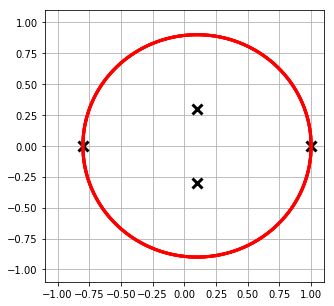

In [8]:
plt.figure(figsize = (5,5))
for i in range(N):
    plot_circle(centers[i],radii[i]) # plot disk i
    plt.plot(np.real(evals[i]),np.imag(evals[i]),'kx',mew=3,ms=10) #plot evalue i
lim=1.1
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()